In [8]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import OrderedDict
sns.set_style('darkgrid')

%matplotlib inline


## Gather

##### `twitter-archived-data` table

In [4]:
df = pd.read_csv('twitter-archive-enhanced.csv')

##### `twitter-image prediction` table

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url, allow_redirects=True)
with open("image-predictions.tsv","wb+") as image_predcitions_file:
    image_predcitions_file.write(response.content)

In [6]:
df_img = pd.read_csv('image-predictions.tsv',delimiter='\t')

#### `twitter-tweets-data` table

In [9]:
df_list=[]
with open("tweet-json.txt", "r") as tweets_file:
    for tweet_str in tweets_file:
        tweet = json.loads(tweet_str)
        #gather data to create a row that will represent this tweet
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        # Append to list of dictionaries
        df_list.append({'tweet_id': int(tweet_id),
                        'retweet_count': int(retweet_count),
                        'favorite_count': int(favorite_count)})
        
df_tweets_extra_data = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df_tweets_extra_data.to_csv('tweets_data.csv',index=False)

In [10]:
df_tweets_data = pd.read_csv('tweets_data.csv')

## Asses

##### `twitter-archived-data` table

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
df.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [14]:
df.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [15]:
df.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Dylan        1
Tommy        1
Willem       1
Duddles      1
Jim          1
Name: name, Length: 957, dtype: int64

In [16]:
df.tweet_id.nunique()

2356

In [17]:
df.query('name == "a"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [18]:
search ="\d+\.\d+\/\d+"

display(df[df['text'].str.count(search)>0])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [19]:
search ="\d/\d"
display(df[df['text'].str.count(search)>1])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
561,802624713319034886,NaN,NaN,2016-11-26 21:26:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Yep... just as I suspected. Yo...",7.776842e+17,4.196984e+09,2016-09-19 01:42:24 +0000,https://twitter.com/dog_rates/status/777684233...,12,10,None,None,None,None,None
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233...,12,10,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
860,763167063695355904,NaN,NaN,2016-08-10 00:16:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Eve. She's a raging alcoho...,6.732953e+17,4.196984e+09,2015-12-06 00:17:55 +0000,https://twitter.com/dog_rates/status/673295268...,8,10,Eve,None,None,pupper,None
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747600769...,10,10,Bookstore,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None


##### `twitter-image prediction` table

In [20]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
df_img.query('p1_dog == False and p2_dog == False and p3_dog == False').count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

In [24]:
df_img.tweet_id.nunique()

2075

#### `twitter-tweets-data` table

In [25]:
df_tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [26]:
df_tweets_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality
##### `twitter-archived-data` table
- There are records that are retweets and not original tweets (181 retweet)
- There are records that are replies to other tweets and not original tweets (78 reply)
- Timestamp column type is string but it should be a datetime
- Not all tweets have expanded_url
- If the original tweet text contained a decimal point the extracted rating_numerator is not valid like in the tweet_id = 883482846933004288
- Some records have 'a' as dog name and some records don't have a dog name at all
- If the original tweet text contained multible '/' the rating may not be correct like in the tweet_id = 835246439529840640
- Rating is divided into two columns
- Not all the tweets include images
- Not all tweets classify dogs stages
- Some images don't have dogs in them like in tweet_id = 746906459439529985
- The dog stages column refer to Nan as None
##### `twitter-image-prediction` table
- 324 records don't have a recognized dog breed
- Some records are missing, we only have 2075 tweet image data
 #### `twitter-tweets-data` table
- There are some deleted tweets for which no data has been found, we only have data for 2354 tweets

### Tidiness
- `twitter-tweets-data` table should be a part of `twitter-archived-data` table
- Dog stages in `twitter-archived-data` table should be a single column containg the dog stage as a categorical value
- `twitter-image-prediction` should be a part of `twitter-archived-data`
- `twitter-image-prediction` table should contain tweet_id and dog breed columns only with the highest prediction value, instead it has multible possible predictions


## Clean

In [27]:
df_clean = df.copy()
df_img_clean = df_img.copy()
df_tweets_data_clean = df_tweets_data.copy()

**324 records don't have a recognized dog breed**
### Define
Drop records that don't have a reconized dog breed

### Code

In [28]:
df_img_clean.drop(df_img_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').index, inplace = True)

### Test

In [29]:
df_img_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [30]:
df_img_clean.shape

(1751, 12)

**Table should contain tweet_id and dog breed columns only with the highest prediction value, instead it has multible possible predictions**
### Define
Add new column named 'dog_breed' which has most probable dog breed in table `twitter-image-prediction` table

## Code

In [31]:
#df_img_clean['dog_breed']=df_img_clean.apply(lambda row: row.p1 if row.p1_dog else (row.p2 if row.p2_dog else row.p3), axis = 1).head()

dog_breed = [] 
for index, row in df_img_clean.iterrows():
    if row.p1_dog:
        dog_breed.append(row.p1)
    elif row.p2_dog:
        dog_breed.append(row.p2)
    else:
        dog_breed.append(row.p3)
    
df_img_clean['dog_breed'] = dog_breed    


## Test

In [32]:
df_img_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


In [33]:
df_img_clean.query('p1_dog == False and p2_dog == True').head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True,Newfoundland
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False,Irish_terrier
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True,miniature_pinscher
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False,Rottweiler
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True,vizsla


In [34]:
df_img_clean.query('p1_dog == False and p2_dog == False and p3_dog== True').head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True,Chesapeake_Bay_retriever
126,668256321989451776,https://pbs.twimg.com/media/CUYflCXWEAAzQVu.jpg,1,canoe,0.407683,False,paddle,0.115550,False,Pembroke,0.094429,True,Pembroke
131,668297328638447616,https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg,1,king_penguin,0.606747,False,ice_bear,0.264221,False,Eskimo_dog,0.032784,True,Eskimo_dog
158,668872652652679168,https://pbs.twimg.com/media/CUhQIAhXAAA2j7u.jpg,1,teddy,0.413379,False,pillow,0.325623,False,miniature_schnauzer,0.035537,True,miniature_schnauzer


In [35]:
df_img_clean['dog_breed'].value_counts()

golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
pug                      65
                       ... 
Japanese_spaniel          1
Irish_wolfhound           1
silky_terrier             1
EntleBucher               1
Bouvier_des_Flandres      1
Name: dog_breed, Length: 113, dtype: int64

In [36]:
#drop unneeded columns and verify that remaining columns are the columns required for analysis
df_img_clean.drop(df_img_clean.columns[[1,2,3,4,5,6,7,8,9,10,11]], axis=1,inplace=True)
df_img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   1751 non-null   int64 
 1   dog_breed  1751 non-null   object
dtypes: int64(1), object(1)
memory usage: 41.0+ KB


**`twitter-tweets-data` table should be a part of `twitter-archived-data` table** <br>
**There are some deleted tweets for which no data has been found in the `twitter-tweets-data` table, we only have data for 2354 tweets**
### Define
Merge the two tables such that all the records that exist in the `twitter-tweets-data` table should be kept and extra records in `twitter-archived-data` should be dropped

### Code

In [37]:
#since the twitter-tweets-data is a part of the twitter-archived-data an inner join should accomplish what we need
df_clean=pd.merge(df_tweets_data_clean,df_clean,how='inner',on='tweet_id')

### Test

In [38]:
df_clean.head()

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,8853,39467,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,6514,33819,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,4328,25461,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,8964,42908,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,9774,41048,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   int64  
 1   retweet_count               2354 non-null   int64  
 2   favorite_count              2354 non-null   int64  
 3   in_reply_to_status_id       78 non-null     float64
 4   in_reply_to_user_id         78 non-null     float64
 5   timestamp                   2354 non-null   object 
 6   source                      2354 non-null   object 
 7   text                        2354 non-null   object 
 8   retweeted_status_id         179 non-null    float64
 9   retweeted_status_user_id    179 non-null    float64
 10  retweeted_status_timestamp  179 non-null    object 
 11  expanded_urls               2295 non-null   object 
 12  rating_numerator            2354 non-null   int64  
 13  rating_denominator          2354 

**`twitter-image-prediction` should be a part of `twitter-archived-data`** <br>
**Not all the tweets include images** <br>
**Not all tweets have expanded_url** <br>
### Define
Merge the two tables such that all the records that exist in the `twitter-image-prediction` table should be kept and extra records in `twitter-archived-data` should be dropped


### Code

In [40]:
#since the twitter-image-prediction is a part of the twitter-archived-data an inner join should accomplish what we need
df_clean=pd.merge(df_img_clean,df_clean,how='inner',on='tweet_id')

### Test

In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 0 to 1749
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1750 non-null   int64  
 1   dog_breed                   1750 non-null   object 
 2   retweet_count               1750 non-null   int64  
 3   favorite_count              1750 non-null   int64  
 4   in_reply_to_status_id       20 non-null     float64
 5   in_reply_to_user_id         20 non-null     float64
 6   timestamp                   1750 non-null   object 
 7   source                      1750 non-null   object 
 8   text                        1750 non-null   object 
 9   retweeted_status_id         64 non-null     float64
 10  retweeted_status_user_id    64 non-null     float64
 11  retweeted_status_timestamp  64 non-null     object 
 12  expanded_urls               1750 non-null   object 
 13  rating_numerator            1750 

In [42]:
df_clean.head()

,tweet_id,dog_breed,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,666020888022790149,Welsh_springer_spaniel,532,2535,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
1,666029285002620928,redbone,48,132,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2,666033412701032449,German_shepherd,47,128,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
3,666044226329800704,Rhodesian_ridgeback,147,311,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
4,666049248165822465,miniature_pinscher,41,111,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


**In `twitter-archived-data` there are records that are retweets and not original tweets (181 retweet)**
### Define
Drop all the records where the column `retweeted_status_id` has value, then drop retweet columns since they will always be 'NaN' for original tweets

### Code

In [43]:
df_clean.drop(df_clean[df_clean['retweeted_status_id'].notnull()].index,inplace=True)

### Test

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1749
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1686 non-null   int64  
 1   dog_breed                   1686 non-null   object 
 2   retweet_count               1686 non-null   int64  
 3   favorite_count              1686 non-null   int64  
 4   in_reply_to_status_id       20 non-null     float64
 5   in_reply_to_user_id         20 non-null     float64
 6   timestamp                   1686 non-null   object 
 7   source                      1686 non-null   object 
 8   text                        1686 non-null   object 
 9   retweeted_status_id         0 non-null      float64
 10  retweeted_status_user_id    0 non-null      float64
 11  retweeted_status_timestamp  0 non-null      object 
 12  expanded_urls               1686 non-null   object 
 13  rating_numerator            1686 

In [45]:
#drop retweets columns
df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1,inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1749
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1686 non-null   int64  
 1   dog_breed              1686 non-null   object 
 2   retweet_count          1686 non-null   int64  
 3   favorite_count         1686 non-null   int64  
 4   in_reply_to_status_id  20 non-null     float64
 5   in_reply_to_user_id    20 non-null     float64
 6   timestamp              1686 non-null   object 
 7   source                 1686 non-null   object 
 8   text                   1686 non-null   object 
 9   expanded_urls          1686 non-null   object 
 10  rating_numerator       1686 non-null   int64  
 11  rating_denominator     1686 non-null   int64  
 12  name                   1686 non-null   object 
 13  doggo                  1686 non-null   object 
 14  floofer                1686 non-null   object 
 15  pupp

**In `twitter-archived-data` replies to other tweets and not original tweets (78 reply)**
### Define
Drop all the records where the column `in_reply_to_status_id` has value, then drop reply columns since they will always be 'NaN' for original tweets

### Code

In [46]:
df_clean.drop(df_clean[df_clean['in_reply_to_status_id'].notnull()].index,inplace=True)

### Test

In [47]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1749
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1666 non-null   int64  
 1   dog_breed              1666 non-null   object 
 2   retweet_count          1666 non-null   int64  
 3   favorite_count         1666 non-null   int64  
 4   in_reply_to_status_id  0 non-null      float64
 5   in_reply_to_user_id    0 non-null      float64
 6   timestamp              1666 non-null   object 
 7   source                 1666 non-null   object 
 8   text                   1666 non-null   object 
 9   expanded_urls          1666 non-null   object 
 10  rating_numerator       1666 non-null   int64  
 11  rating_denominator     1666 non-null   int64  
 12  name                   1666 non-null   object 
 13  doggo                  1666 non-null   object 
 14  floofer                1666 non-null   object 
 15  pupp

In [48]:
#drop replies columns
df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1,inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1749
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1666 non-null   int64 
 1   dog_breed           1666 non-null   object
 2   retweet_count       1666 non-null   int64 
 3   favorite_count      1666 non-null   int64 
 4   timestamp           1666 non-null   object
 5   source              1666 non-null   object
 6   text                1666 non-null   object
 7   expanded_urls       1666 non-null   object
 8   rating_numerator    1666 non-null   int64 
 9   rating_denominator  1666 non-null   int64 
 10  name                1666 non-null   object
 11  doggo               1666 non-null   object
 12  floofer             1666 non-null   object
 13  pupper              1666 non-null   object
 14  puppo               1666 non-null   object
dtypes: int64(5), object(10)
memory usage: 208.2+ KB


**In `twitter-archived-data` the timestamp column type is string but it should be a datetime**
### Define
Convert timestamp column to datetime 

### Code

In [49]:
df_clean['timestamp']=pd.to_datetime(df_clean['timestamp'])

### Test

In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1749
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1666 non-null   int64              
 1   dog_breed           1666 non-null   object             
 2   retweet_count       1666 non-null   int64              
 3   favorite_count      1666 non-null   int64              
 4   timestamp           1666 non-null   datetime64[ns, UTC]
 5   source              1666 non-null   object             
 6   text                1666 non-null   object             
 7   expanded_urls       1666 non-null   object             
 8   rating_numerator    1666 non-null   int64              
 9   rating_denominator  1666 non-null   int64              
 10  name                1666 non-null   object             
 11  doggo               1666 non-null   object             
 12  floofer             1666 non-null 

**In `twitter-archived-data`table the dog stages column refer to Nan as None**
### Define
Convert None to Nan

### Code

In [51]:
df_clean.doggo=df_clean.doggo.replace('None', np.nan)
df_clean.floofer=df_clean.floofer.replace('None', np.nan)
df_clean.pupper=df_clean.pupper.replace('None', np.nan)
df_clean.puppo=df_clean.puppo.replace('None', np.nan)

### Test

In [52]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1749
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1666 non-null   int64              
 1   dog_breed           1666 non-null   object             
 2   retweet_count       1666 non-null   int64              
 3   favorite_count      1666 non-null   int64              
 4   timestamp           1666 non-null   datetime64[ns, UTC]
 5   source              1666 non-null   object             
 6   text                1666 non-null   object             
 7   expanded_urls       1666 non-null   object             
 8   rating_numerator    1666 non-null   int64              
 9   rating_denominator  1666 non-null   int64              
 10  name                1666 non-null   object             
 11  doggo               63 non-null     object             
 12  floofer             8 non-null    

**In `twitter-archived-data` If the original tweet text contained a decimal point the extracted rating_numerator is not valid like in the tweet_id = 883482846933004288**
### Define
Extract correct numerator from tweets text and correct the value in the dataframe

### Code

In [53]:
search ="(\d+\.\d+\/\d+)"
df_clean.loc[df_clean['text'].str.count(search)>0,'rating_numerator']=df_clean[df_clean['text'].str.count(search)>0]['text'].str.extract(search)[0].str.split('/',1).str[0].str.split('.').str[0]


### Test

In [54]:
display(df_clean[df_clean['text'].str.count(search)>0])

,tweet_id,dog_breed,retweet_count,favorite_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
483,680494726643068929,kuvasz,542,1879,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11,10,None,NaN,NaN,NaN,NaN
1201,778027034220126208,clumber,1885,7320,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11,10,Sophie,NaN,NaN,pupper,NaN
1251,786709082849828864,Pomeranian,7069,20296,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9,10,Logan,NaN,NaN,NaN,NaN
1712,883482846933004288,golden_retriever,10407,46860,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13,10,Bella,NaN,NaN,NaN,NaN


## Store

In [55]:
df_clean.head()

,tweet_id,dog_breed,retweet_count,favorite_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,666020888022790149,Welsh_springer_spaniel,532,2535,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,NaN,NaN,NaN,NaN
1,666029285002620928,redbone,48,132,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN
2,666033412701032449,German_shepherd,47,128,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
3,666044226329800704,Rhodesian_ridgeback,147,311,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
4,666049248165822465,miniature_pinscher,41,111,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN,NaN,NaN,NaN


In [56]:
df_clean.to_csv('twitter_archive_master.csv',index=False)

## Visualizations & Insights

In [57]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,dog_breed,retweet_count,favorite_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,666020888022790149,Welsh_springer_spaniel,532,2535,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,NaN,NaN,NaN,NaN
1,666029285002620928,redbone,48,132,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN
2,666033412701032449,German_shepherd,47,128,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
3,666044226329800704,Rhodesian_ridgeback,147,311,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
4,666049248165822465,miniature_pinscher,41,111,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN,NaN,NaN,NaN


**Q1 : What does the retweets count distribution look like ?**

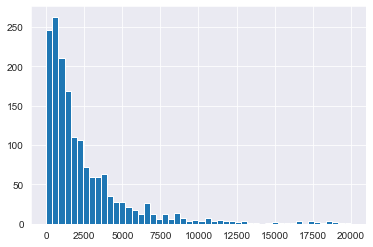

In [58]:
df['retweet_count'].hist(bins=50,range=[0,20000]);

It seems like it is a right-skewd distribution, so that means that a small portion of the tweets were retweeted while most of the tweets did not get retweeted

**Q2: What does the favourite count distribution look like ?**

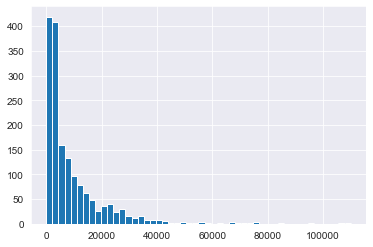

In [59]:
df['favorite_count'].hist(bins=50,range=[0,110000]);

It seems like it is also a right-skewd distribution, so that means that a small portion of the tweets were favorited while most of the tweets did not get favorited

**Q3: what is the relation between tweets rating and retweet count ?**

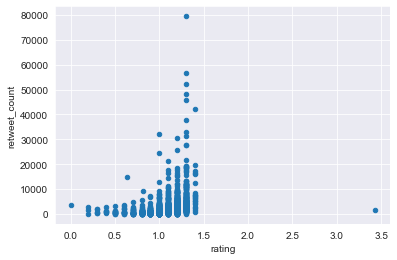

In [60]:
df['rating']=df['rating_numerator']/df['rating_denominator']

df.plot(x='rating',y='retweet_count',kind='scatter');

There is a positive correlation between the tweet rating and the retweet count.

**Q4: what is the relation between the rating and the favourite count ?**

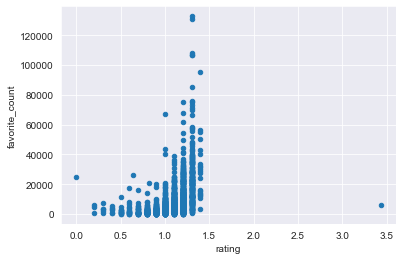

In [61]:
df.plot(x='rating',y='favorite_count',kind='scatter');

There is a positive correlation between the tweet rating and the favourite count.

**Q5: Is there a relation between the retweet count and the favourite count ?**

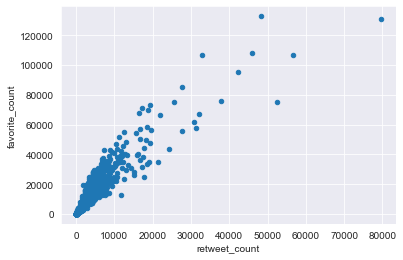

In [62]:
df.plot(x='retweet_count',y='favorite_count',kind='scatter');

Yes there is a positive correlation between the two, this makes sense because it means that the tweets that had a high retweet count also had a high favourite count.

**Q6: how many tweets were posted by the page by year ?**

In [63]:
df['tweet_year']=pd.to_datetime(df['timestamp']).dt.year

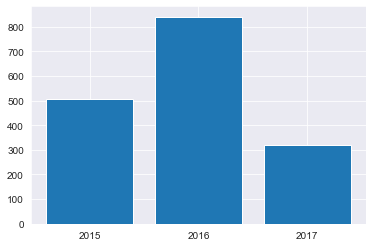

In [64]:
tweets_per_year=df.groupby('tweet_year')['tweet_id'].count().reset_index(name='count')
plt.bar(tweets_per_year['tweet_year'].astype(str), tweets_per_year['count']);

Even though the account started in 2015, most of the tweets that included pictures were posted in 2016, 

**Q7: which breeds had the most retweets ?**

In [66]:
retweets_breed_mean = df.groupby('dog_breed')['retweet_count'].mean().nlargest(10)
retweets_breed=df.groupby('dog_breed')['retweet_count'].mean().nlargest(10).reset_index(name='count')['dog_breed']

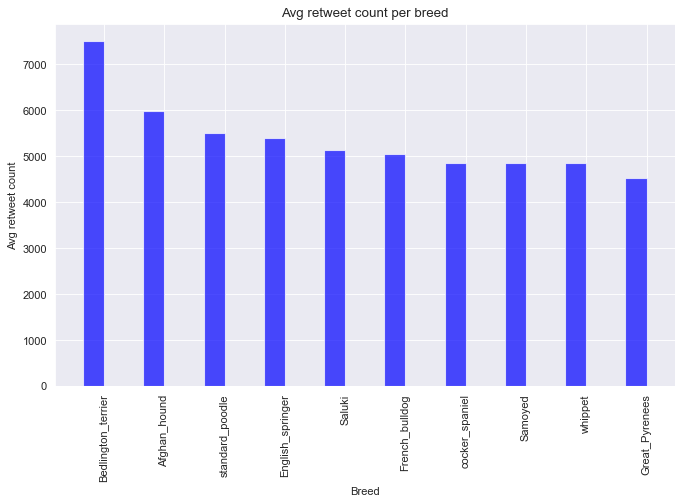

In [67]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 80
ind = np.arange(10)  # the x locations for the groups
width = 0.35       # the width of the bars
# plot bars
red_bars = plt.bar(ind, retweets_breed_mean, width, color='b', alpha=.7)

# title and labels
plt.ylabel('Avg retweet count')
plt.xlabel('Breed')
plt.title('Avg retweet count per breed')
locations = ind + width / 2  # xtick locations
plt.xticks(locations, retweets_breed,rotation='vertical');


**Q8: which breeds had the most favourite counts ?**

In [68]:
favourite_breed_mean = df.groupby('dog_breed')['favorite_count'].mean().nlargest(10)
favourite_breed=df.groupby('dog_breed')['favorite_count'].mean().nlargest(10).reset_index(name='count')['dog_breed']

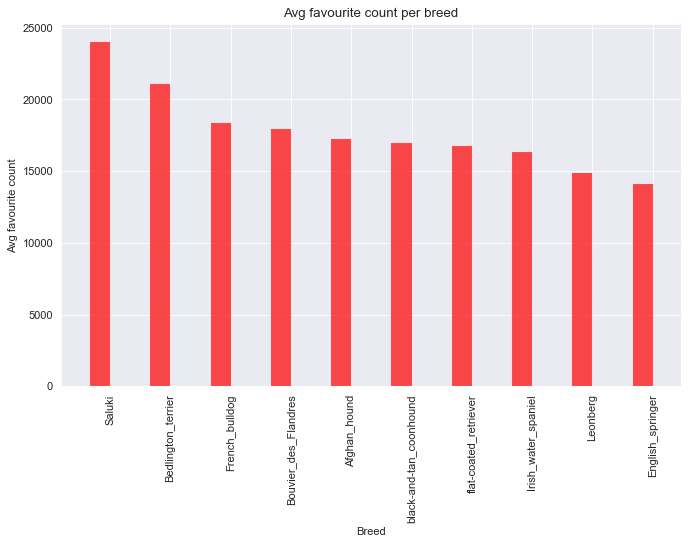

In [69]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 80
ind = np.arange(10)  # the x locations for the groups
width = 0.35       # the width of the bars
# plot bars
red_bars = plt.bar(ind, favourite_breed_mean, width, color='r', alpha=.7)

# title and labels
plt.ylabel('Avg favourite count')
plt.xlabel('Breed')
plt.title('Avg favourite count per breed')
locations = ind + width / 2  # xtick locations
plt.xticks(locations, favourite_breed,rotation='vertical');

**Q9: which breed had the most retweets and most favourites counts ?**

In [70]:
target_breeds = list(OrderedDict.fromkeys(favourite_breed.tolist()+retweets_breed.tolist()))

breed_grouped = df.groupby('dog_breed')

target_breeds_fav_count=[]
target_breeds_retweet_count=[]
for name in target_breeds:
    group=breed_grouped.get_group(name)
    target_breeds_fav_count.append(group.favorite_count.mean())
    target_breeds_retweet_count.append(group.retweet_count.mean())

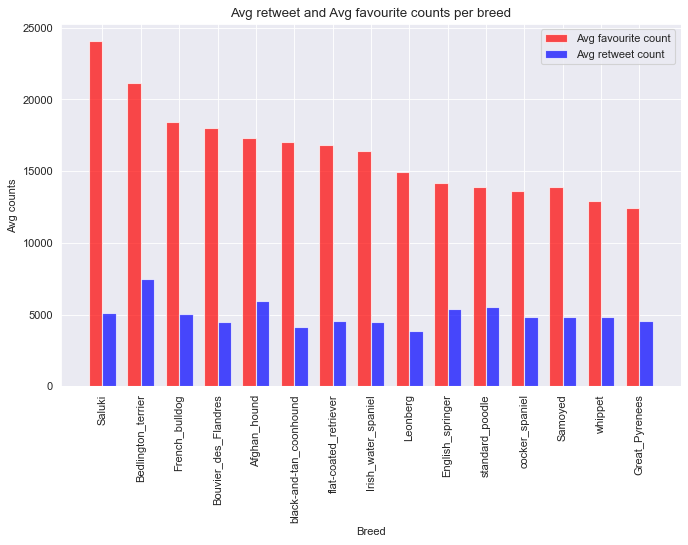

In [71]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 80
ind = np.arange(len(target_breeds))  # the x locations for the groups
width = 0.35       # the width of the bars
# plot bars
fav_bars = plt.bar(ind, target_breeds_fav_count, width, color='r', alpha=.7, label='Avg favourite count')
retweet_bars = plt.bar(ind + width, target_breeds_retweet_count, width, color='b', alpha=.7, label='Avg retweet count')


# title and labels
plt.ylabel('Avg counts')
plt.xlabel('Breed')
plt.title('Avg retweet and Avg favourite counts per breed')
locations = ind + width / 2  # xtick locations
plt.xticks(locations, target_breeds,rotation='vertical')
plt.legend();

It seems that the average favourite count is much higher than average retweet counts, and that the best dog breed that was retweeted the most and favorited the most was 'Bedington_terrier'